#📌 Extracción

### Cargar los datos directamente de la API

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Conocer el conjunto de datos

Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [22]:
telecomData = pd.read_json('/content/TelecomX_Data.json')

In [23]:
telecomData.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Explorar las columnas del dataset y verificar sus tipos de datos.

In [24]:
telecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Consultar el diccionario para comprender mejor el significado de las variables.

In [25]:
telecomCustomer = pd.json_normalize(telecomData['customer'])
telecomPhone = pd.json_normalize(telecomData['phone'])
telecomInternet = pd.json_normalize(telecomData['internet'])
telecomAccount = pd.json_normalize(telecomData['account'])

telecomData = pd.concat([telecomData.drop(['customer', 'phone', 'internet', 'account'],
                                          axis = 1), telecomCustomer, telecomPhone, telecomInternet, telecomAccount],
                        axis = 1)
telecomData.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformación

In [26]:
telecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

In [27]:
telecomData.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [28]:
datosDuplicados = telecomData[telecomData['customerID'].duplicated(keep=False)]
datosDuplicados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


Ajustar los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [29]:
telecomData.columns.str.lower().str.replace('.', '')

Index(['customerid', 'churn', 'gender', 'seniorcitizen', 'partner',
       'dependents', 'tenure', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'chargesmonthly', 'chargestotal'],
      dtype='object')

In [30]:
telecomData.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [31]:
telecomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [32]:
telecomData.describe()

,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [42]:
pd.to_numeric(telecomData['Charges.Total'], errors='coerce')
pd.to_numeric(telecomData['SeniorCitizen'], errors='coerce')
pd.to_numeric(telecomData['tenure'], errors='coerce')
telecomData.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [34]:
telecomData.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


Crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [35]:
telecomData['CuentasDiarias'] = telecomData['Charges.Monthly'] / 30
telecomData.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [36]:
telecomData['Churn'] = telecomData['Churn'].apply(lambda x: x if x == 'Yes' or x =='No' else 'NA')
telecomData.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [37]:
telecomData['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
NA,224


In [38]:
telecomData.describe()

,SeniorCitizen,tenure,Charges.Monthly,CuentasDiarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2.157337
std,0.369074,24.571773,30.129572,1.004319
min,0.000000,0.000000,18.250000,0.608333
25%,0.000000,9.000000,35.425000,1.180833
50%,0.000000,29.000000,70.300000,2.343333
75%,0.000000,55.000000,89.875000,2.995833
max,1.000000,72.000000,118.750000,3.958333


#📊 Carga y análisis

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

/tmp/ipython-input-39-2118728802.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=telecomData, palette=colores)


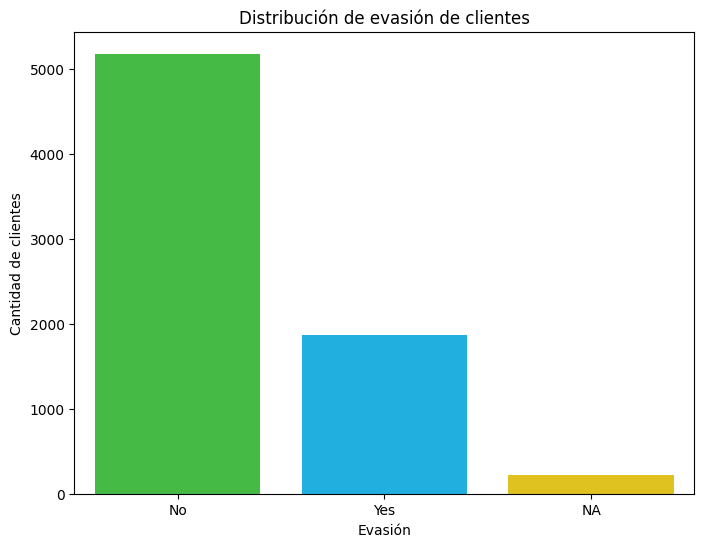

In [39]:
colores = ['limegreen', 'deepskyblue', 'gold']

plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=telecomData, palette=colores)
plt.title('Distribución de evasión de clientes')
plt.xlabel('Evasión')
plt.ylabel('Cantidad de clientes')
plt.show()

In [40]:
telecomChurn = telecomData.query('Churn == "Yes"')
telecomChurn.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,CuentasDiarias
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667
18,0022-TCJCI,Yes,Male,1,No,No,45,Yes,No,DSL,...,Yes,No,No,Yes,One year,No,Credit card (automatic),62.7,2791.5,2.090000
19,0023-HGHWL,Yes,Male,1,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.1,25.1,0.836667


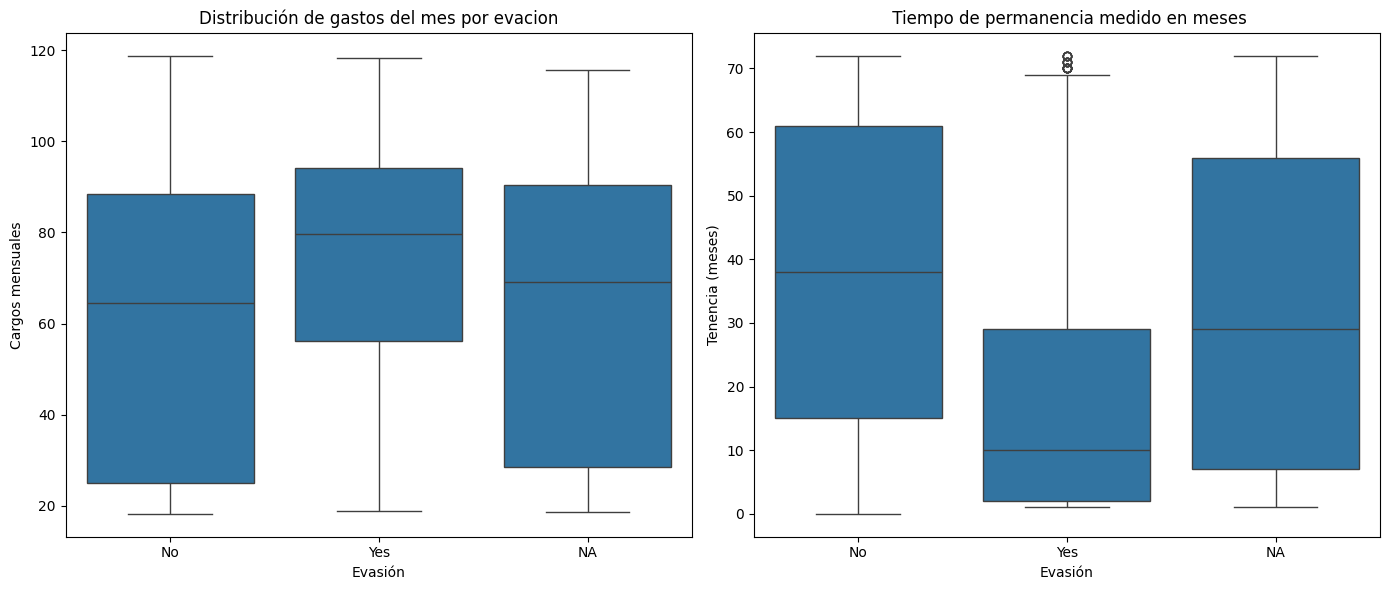

In [45]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(data = telecomData, x='Churn', y='Charges.Monthly')
plt.title('Distribución de gastos del mes por evacion')
plt.xlabel('Evasión')
plt.ylabel('Cargos mensuales')

plt.subplot(1, 2, 2)
sns.boxplot(data = telecomData, x='Churn', y='tenure')
plt.title(' Tiempo de permanencia medido en meses')
plt.xlabel('Evasión')
plt.ylabel('Tenencia (meses)')

plt.tight_layout()
plt.show()


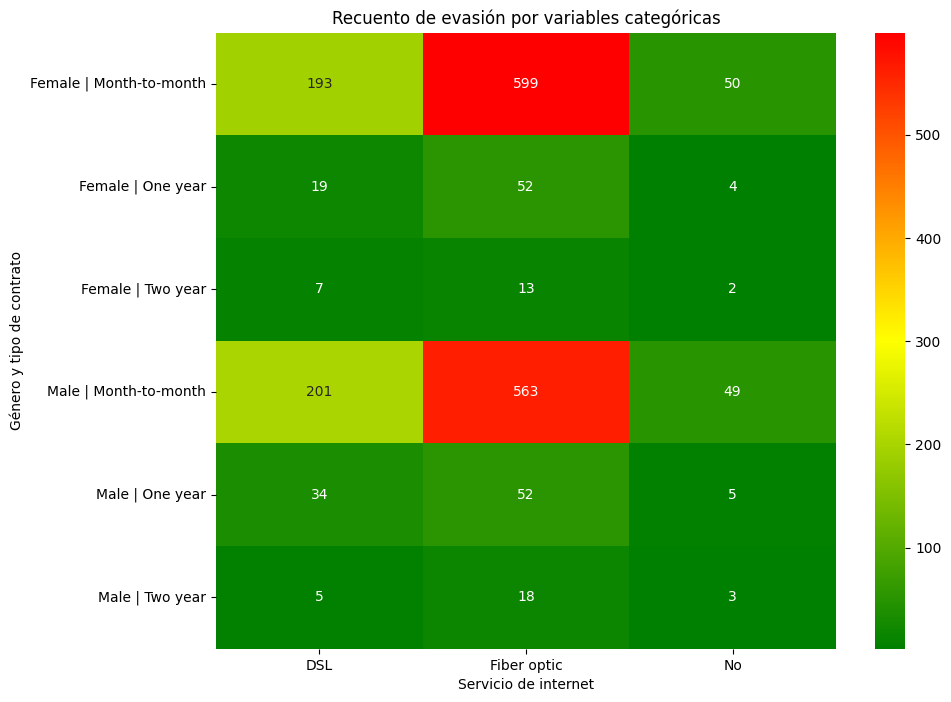

In [47]:
from matplotlib.colors import LinearSegmentedColormap
telecomChurn[['gender','InternetService','Contract']].value_counts()
telecomChurn = telecomChurn.copy()

telecomChurn['Gender_Contract'] = telecomChurn['gender'] + " | " + telecomChurn['Contract']

heatmap_data = telecomChurn.groupby(['Gender_Contract', 'InternetService']).size().unstack()

semaforo = LinearSegmentedColormap.from_list("semaforo", ["green", "yellow", "red"])

plt.figure(figsize=(10, 8))

sns.heatmap(heatmap_data, annot=True, fmt='d', cmap=semaforo)
plt.title('Recuento de evasión por variables categóricas')
plt.xlabel('Servicio de internet')
plt.ylabel('Género y tipo de contrato')
plt.show()

#📄Informe final

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

### Introducción

El objetivo del análisis fue identificar las variables que influyen en que los clientes dejen el servicio de la compañía Telecom X. Para esto, se analizaron las variables "Churn", "Internet Service", "Gender", "Contract", las cuales contienen si el cliente dejó el servicio, cual es el tipo de contrato con el que cuenta, así como el contrato y el género del cliente. Estas variables son de importancia ya que permiten identificar cuál es el costo y el pago por mes que mantienen los clientes, así como si han dejado o no el servicio.

#### Limpieza y tratamiento de datos

1.   Identificación de valores nulos en las diferentes columnas
2.   Modificación de nombres en las columnas
3.   Conversión de tipo de datos a su correspondiente formato. Modificación a datos tipo "float" y "numeric"
4.   Creación de columna "CuentasDiarias", la cual contiene la cantidad de pago diaria hecho por los diferentes clientes.






#### Análisis exploratorio de datos

Se realizaron gráficas correspondientes al tipo de contrato que tienen los clientes y la cantidad de dinero gastada por mes y por día, así como también una gráfica que incluye el tipo de servicio del cliente, así como el tipo de contrato (por mes o año) de acuerdo al género de los clientes.

#### Conclusiones

1.   La evasión de clientes está relacionada a los contratos a corto plazo, algunos cargos mensulaes que resultan ser elevados, así como también una menor antigüedad.
2.   El análisis identificó que aquellos clientes independientemente del género que prefieren o tienen contratos de dos años, es menos probable que evadan o pierdan el servicio comparado con aquellos clientes que prefieren el servicio mes a mes.

#### Recomendaciones

Se sugiere que se presenten planes mes a mes con descuentos o precios favorables, así como también promover que los clientes se cambien a planes a largo plazo. De igual forma, se recomienda que se brinden incentivos a los clientes que ya cuenten con planes a largo plazo, especialmente a aquellos con plan de un año.